In [39]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [41]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [44]:
df.shape

(440, 8)

In [45]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,False
436,False
437,False
438,False


In [46]:
df.duplicated().sum()

0

In [47]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [48]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [49]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler()
x=stscaler.fit_transform(df)


In [50]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [51]:
import scipy.cluster.hierarchy as sch

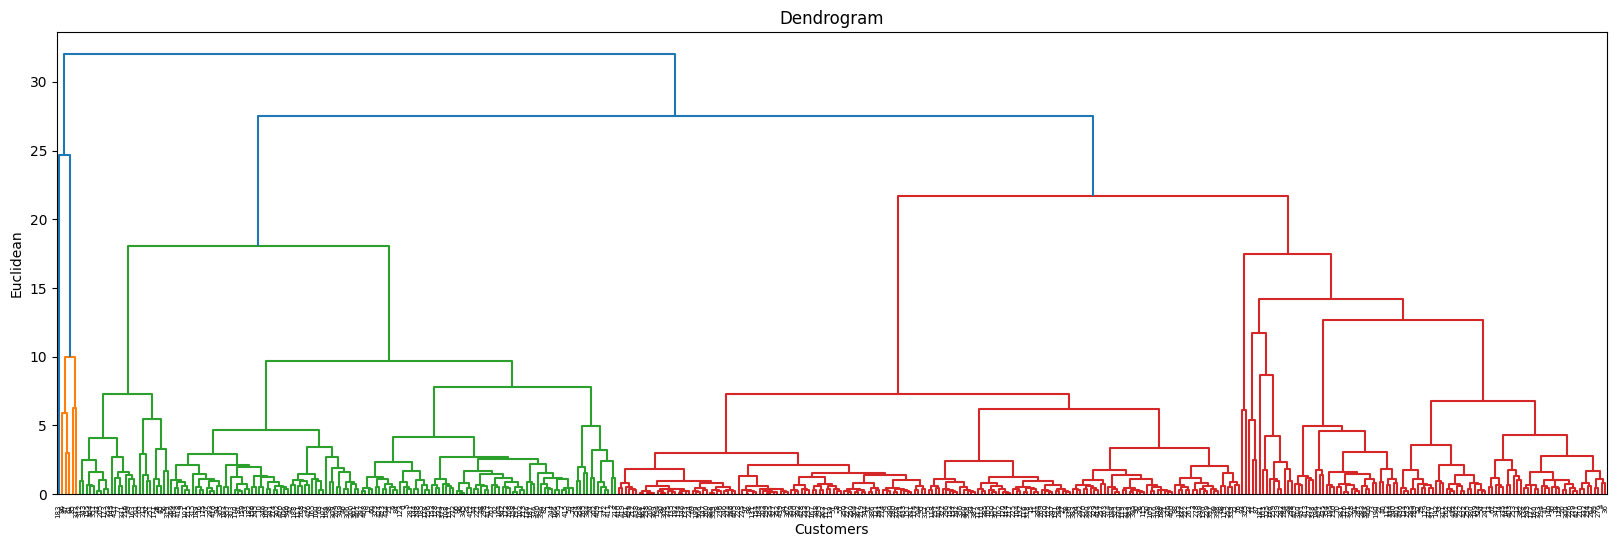

In [52]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean')
plt.show()


In [53]:
len(set(dendo['color_list']))

4

In [54]:
len(set(dendo['color_list']))-1

3

In [55]:
set(dendo['color_list'])

{'C0', 'C1', 'C2', 'C3'}

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
group=AgglomerativeClustering(n_clusters=3)
cluster=group.fit_predict(x)

In [58]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [59]:
cluster.shape

(440,)

In [60]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [61]:
type(cluster)

numpy.ndarray

In [62]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [63]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [64]:
#Model evaluation
from sklearn.metrics import silhouette_score
#check how well your model is making cluster
silhouette_score(x,cluster)

0.2646091480214908

# **K means**

In [65]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [66]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


In [67]:
wcss

[2266.9552665832457,
 1644.0598512347563,
 1326.6746082135523,
 1070.2551995135614,
 989.3326418885056,
 856.7070228388113,
 791.8280762163158,
 710.1943394067521,
 668.22250548469]

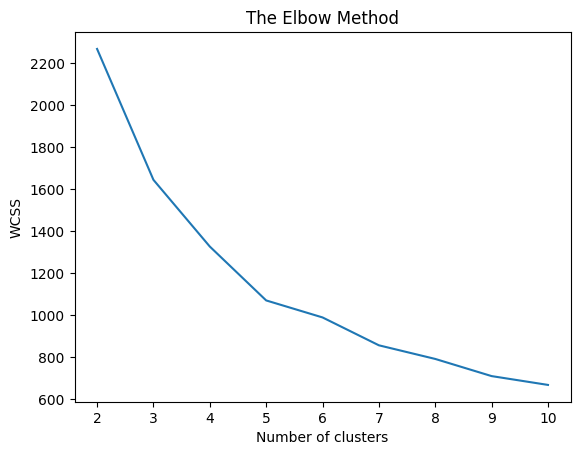

In [68]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
# Fitting k-Means to the dataset
model=KMeans(n_clusters=5,random_state=0)
groups=model.fit_predict(x)


In [70]:
type(groups)

numpy.ndarray

In [76]:
groups.shape

(440,)

In [74]:
groups

array([2, 3, 3, 2, 0, 2, 2, 2, 2, 3, 3, 2, 0, 3, 3, 2, 3, 2, 2, 2, 2, 2,
       0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 3, 0, 3, 3, 0, 0, 2, 3, 3,
       3, 3, 3, 1, 3, 3, 2, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 1, 2, 3, 2, 1,
       2, 3, 2, 2, 0, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 3, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 3, 3, 2, 3,
       2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3,
       0, 2, 2, 2, 2, 0, 3, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 0, 0, 3,
       2, 2, 3, 3, 0, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,

In [79]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [81]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,3
2,3
3,2
4,0
...,...
435,0
436,0
437,3
438,2


In [85]:
cust_Kmeans_data=pd.concat([df,group_num],axis=1)
cust_Kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,2


In [89]:
cust_kmeans_data[cust_kmeans_data['Group']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
23,26373,36423,22019,5154,4337,16523,1
47,44466,54259,55571,7782,24171,6465,1
56,4098,29892,26866,2616,17740,1340,1
61,35942,38369,59598,3254,26701,2017,1
65,85,20959,45828,36,24231,1423,1
85,16117,46197,92780,1026,40827,2944,1
86,22925,73498,32114,987,20070,903,1
92,9198,27472,32034,3232,18906,5130,1
211,12119,28326,39694,4736,19410,2870,1
251,6134,23133,33586,6746,18594,5121,1


In [90]:
cust_kmeans_data[cust_kmeans_data['Group']==2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
3,13265,1196,4221,6404,507,1788,2
5,9413,8259,5126,666,1795,1451,2
6,12126,3199,6975,480,3140,545,2
7,7579,4956,9426,1669,3321,2566,2
...,...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395,2
433,1982,3218,1493,1541,356,1449,2
434,16731,3922,7994,688,2371,838,2
438,10290,1981,2232,1038,168,2125,2


In [91]:
cust_kmeans_data[cust_kmeans_data['Group']==3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
9,6006,11093,18881,1159,7425,2098,3
10,3366,5403,12974,4400,5977,1744,3
13,21217,6208,14982,3095,6707,602,3
...,...,...,...,...,...,...,...
416,4389,10940,10908,848,6728,993,3
418,660,8494,18622,133,6740,776,3
420,4456,5266,13227,25,6818,1393,3
426,13134,9347,14316,3141,5079,1894,3


In [95]:
cust_kmeans_data[cust_kmeans_data['Group']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
183,36847,43950,20170,36534,239,47943,4


In [94]:
cust_kmeans_data[cust_kmeans_data['Group']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
4,22615,5410,7198,3915,1777,5185,0
12,31714,12319,11757,287,3881,2931,0
22,31276,1917,4469,9408,2381,4334,0
29,43088,2100,2609,1200,1107,823,0
33,29729,4786,7326,6130,361,1083,0
...,...,...,...,...,...,...,...
425,11243,2408,2593,15348,108,1886,0
427,31012,16687,5429,15082,439,1163,0
431,8533,5506,5160,13486,1377,1498,0
435,29703,12051,16027,13135,182,2204,0


In [99]:
np.round(silhouette_score(x,groups),2)

0.37

**DBSCAN**

In [104]:
from sklearn.cluster import DBSCAN

In [102]:
dbscan=DBSCAN(eps=3.2,min_samples=10)
dbscan.fit(x)

DBSCAN(eps=3.2, min_samples=10)